<a href="https://colab.research.google.com/github/ViniFogliarini/dnc_python/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bibliotecas

In [8]:
!pip install sidetable
!pip install pandas.profiling==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

### Configuração Figura - Gráficos

In [10]:
sns.set_theme(
    context = 'talk',
    style = 'ticks',
    font_scale = 8,
    rc = {
        'figure.figsize' : (12,8)
    }
)

### Criando DataFrame

In [16]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/titanic_dataset.csv', sep =',')

### Analisando Nossos Dados

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.profile_report()

### Dados Duplicados

In [ ]:
df.duplicated(keep=False).sum() # nesse caso não temos nenhuma
df[df.duplicated(keep=False)] # para ver as linhas duplicadas

In [ ]:
df.drop_duplicates() # remover as duplicadas
df.drop_duplicates(subset=[coluna]) # remover apenas desta coluna

### Dados Nulos

In [24]:
# Sempre se questione o motivo dos nulos!

df.isna() #para ver onde tem valores nulos (True)
df.isna().sum() #soma dos valores nulos


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df.isna().sum() / df.shape[0] * 100  # Quantos % estão nulos

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [40]:
# Agrupando em uma tabela
df_missing = (
    df.isna().sum()
    .to_frame('missing_count')
    .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
    .sort_values('missing_count', ascending = False)
)

df_missing.style.format('{:.2%}', subset = ['missing_pct'])


,missing_count,missing_pct
Cabin,687,77.10%
Age,177,19.87%
Embarked,2,0.22%
PassengerId,0,0.00%
Survived,0,0.00%
Pclass,0,0.00%
Name,0,0.00%
Sex,0,0.00%
SibSp,0,0.00%
Parch,0,0.00%


#### Método com sintaze em cadeia - Mais rápido

In [42]:
(
    df.isna().sum()
    .to_frame('missing_count')
    .assign(missing_pct = lambda x : x.div(len(df)))
    .sort_values('missing_count', ascending = False)

)

,missing_count,missing_pct
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


#### Utilizando a biblioteca sidetable

In [44]:
df.stb.missing()

,missing,total,percent
Cabin,687,891,77.104377
Age,177,891,19.865320
Embarked,2,891,0.224467
PassengerId,0,891,0.000000
Survived,0,891,0.000000
Pclass,0,891,0.000000
Name,0,891,0.000000
Sex,0,891,0.000000
SibSp,0,891,0.000000
Parch,0,891,0.000000


#### Biblioteca missgno

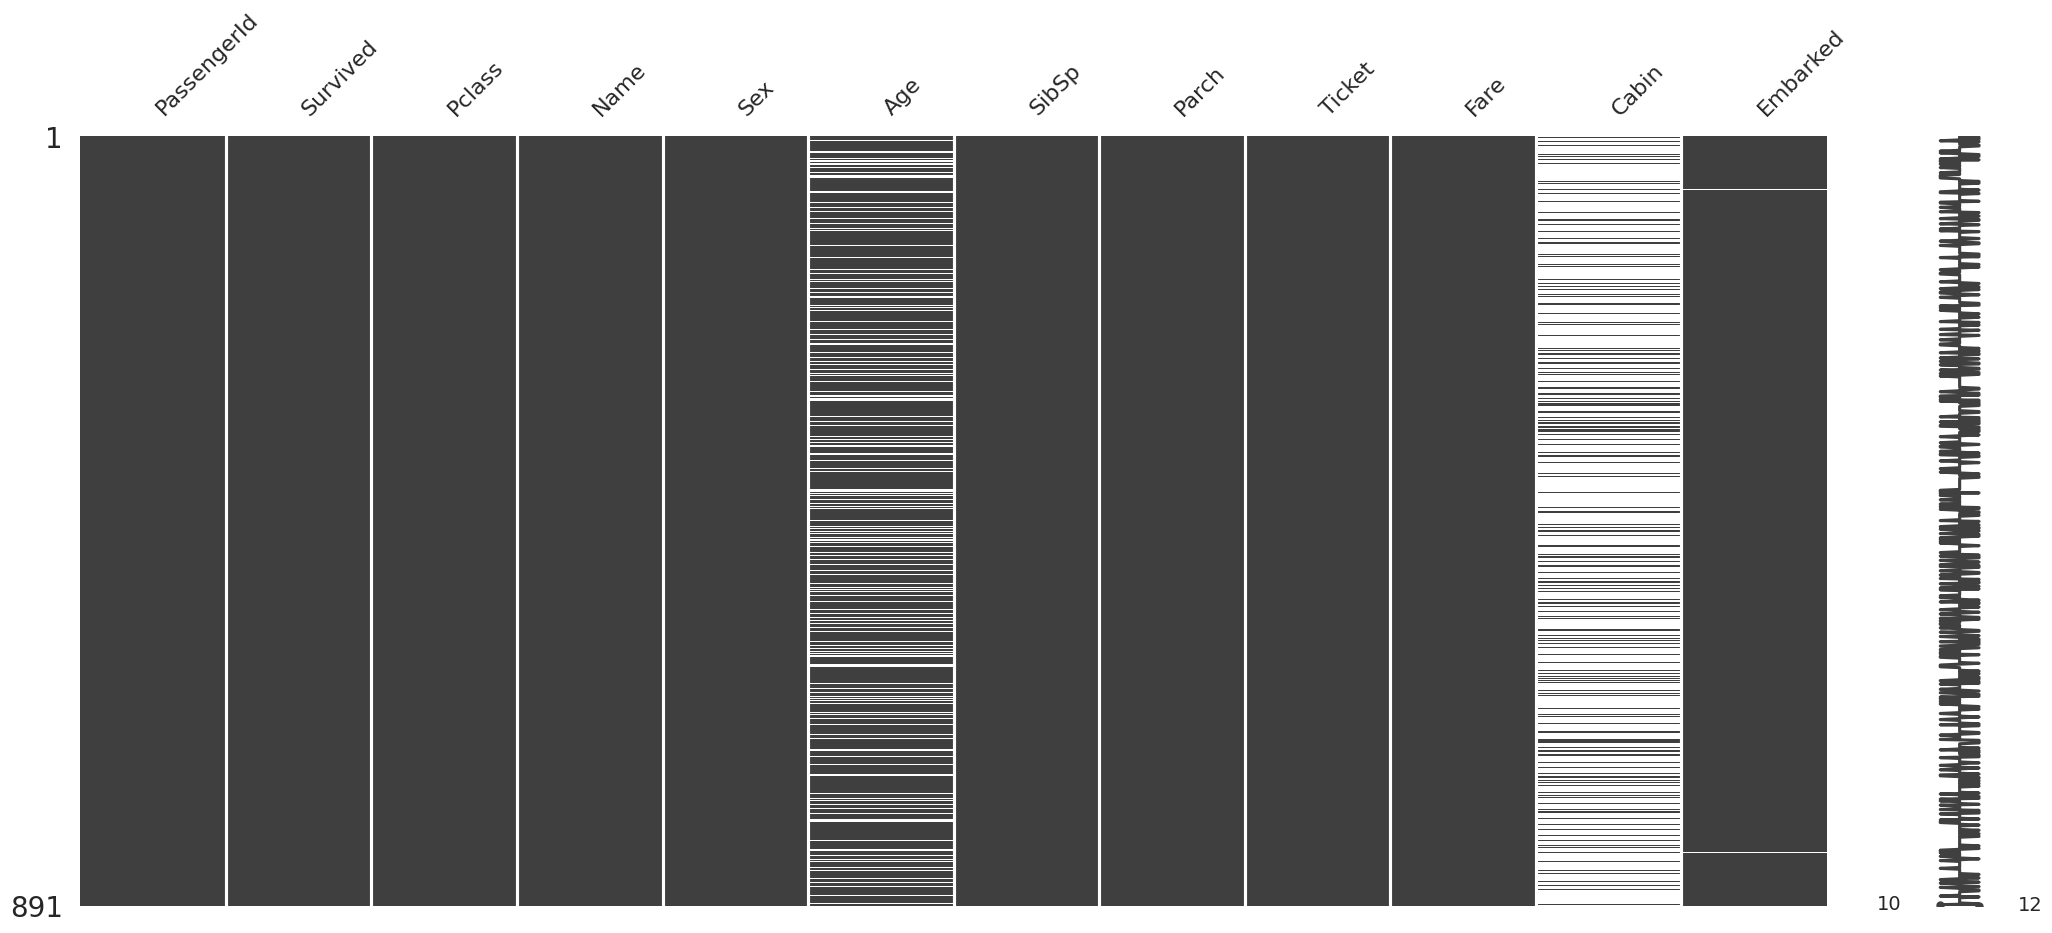

In [47]:
msno.matrix(df);

#### Mostrar linhas com valores faltantes

In [51]:
df[df.isna().any(axis = 1)]
# df.isna().any()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [54]:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Removendo nulos

In [ ]:
# Apagando apenas nulos
df.dropna(subset = ['Cabin'])

# Apagando toda coluna
df.drop(columns = ['Cabin'])



In [72]:
# Valor máximo de NA permitido
max_nan_freq = .7

# Identificando colunas
na_cols = df.isna().sum().div(len(df))
cols2drop = na_cols[na_cols > max_nan_freq].index

# Dropando as colunas
df.drop(columns = cols2drop, inplace = True)

## Imputando Valores Nulos

In [101]:
df.tail()

df.tail().style.highlight_null('yellow')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.450000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.750000,Q


#### Média, Mediana e Moda

In [74]:
df.fillna(0).tail() # preencher todas as colunas com NA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [87]:
(
df.fillna({
           'Age' : df.Age.mean(),
           'Embarked' : df.Embarked.mode()[0]})
            .tail()
 ) # apenas a coluna

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


#### Valores passados, futuros e interpolação

In [93]:
df.fillna(method = 'bfill').tail() # depois

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [94]:
df.fillna(method = 'ffill').tail() #antes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [92]:
df.Age.interpolate().tail() # mistura os dois

# filtro coluna .filter(lika = 'Age') - exemplo

886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: Age, dtype: float64

#### Imputando por grupos - tal sexo com tal idade

In [104]:
df.groupby('Sex')['Age'].apply(lambda x : x.fillna(x.mean())).tail()

886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: Age, dtype: float64